# Regressao em Python #

Vamos agora implementar a Regressão Linear para usarmos com esses dados.

Para resolver a regressão, basta montar o sistema linear correspondente aos dados de entrada:

$$
\begin{bmatrix}
n & \sum\limits _ { i = 1 } ^ { n } x _ { i 1 } & \sum\limits _ { i = 1 } ^ { n } x _ { i 2 } & \dots & \sum\limits _ { i = 1 } ^ { n } x _ { i p }\\
\sum\limits _ { i = 1 } ^ { n } x _ { i 1 } & \sum\limits _ { i = 1 } ^ { n } x _ { i 1 }x _ { i 1 } & \sum\limits _ { i = 1 } ^ { n } x _ { i 2 }x _ { i 1 } & \dots & \sum\limits _ { i = 1 } ^ { n } x _ { i p }x _ { i 1 }\\
\sum\limits _ { i = 1 } ^ { n } x _ { i 2 } & \sum\limits _ { i = 1 } ^ { n } x _ { i 1 }x _ { i 2 } & \sum\limits _ { i = 1 } ^ { n } x _ { i 2 }x _ { i 2 } & \dots & \sum\limits _ { i = 1 } ^ { n } x _ { i p }x _ { i 2 }\\
\vdots & \vdots & \vdots & \vdots & \vdots \\
\sum\limits _ { i = 1 } ^ { n } x _ { i p } & \sum\limits _ { i = 1 } ^ { n } x _ { i 1 }x _ { i p } & \sum\limits _ { i = 1 } ^ { n } x _ { i 2 }x _ { i p } & \dots & \sum\limits _ { i = 1 } ^ { n } x _ { i p }x _ { i p }\\
\end{bmatrix}
\begin{bmatrix}
b_0\\
b_1\\
b_2\\
\vdots\\
b_p\\
\end{bmatrix}
=
\begin{bmatrix}
\sum\limits _ { i = 1 } ^ { n } y _ { i 1 }\\
\sum\limits _ { i = 1 } ^ { n } y_i x _ { i 1 }\\
\sum\limits _ { i = 1 } ^ { n } y_i x _ { i 2 }\\
\vdots\\
\sum\limits _ { i = 1 } ^ { n } y_i x _ { i p }
\end{bmatrix}
$$

O que isto quer dizer? Quer dizer que, para fazer uma regressão, basta você passar uma Matriz X contendo as variáveis independentes e um vetor Y com a variável dependente, gerar este sistema e resolvê-lo.

Faça uma função que retorna os coeficientes `b` de uma regressão com os elementos da matriz X:

In [59]:
import numpy as np
import scipy.linalg as sp
import matplotlib.pyplot as plt
%matplotlib inline

def regressaoLinear(x,y):
    xizes = np.zeros((2,2))
    ypslon = np.zeros(2)
    xizes [0][0] = len(x)
    xizes[0][1] = xizes[1][0]
    xizes[1][1] = (x*x).sum()
    ypslon[0] = y.sum()
    ypslon[1] = (x*y).sum()
    
    #b = np.linalg(xizes,ypslon)
    return np.linalg.solve(xizes, ypslon)
    #return b

def regressaoLinearMultipla(x,y): #x é uma matriz ao invés de vetor
    xizes = np.vstack((np.ones(len(x[0]))), x)
    ypslon = xizes.dot(y)
    xizes = xizes.dot(xizes.T)
    return np.linalg.solve(xizes,ypslon)
    
    return b

def resolveLinVet(b,x):
    return b[0]+(b[1:]*xpquad).sum(axis=1)

def resolveLin(b,x):
    return b[0]+b[1:]*x
    

x = np.linspace(0,1,11)
y = np.sqrt(x)

x = np.linspace(0,10,100)
y = x*2+1

b = regressaoLinear(np.array(x),y)

print(b)
#print(resolveLin(b,[6]))

b = regressaoLinear(np.array([4,4.5,5,5.5,6,6.5,7]),np.array([33,42,45,51,53,61,62]))

#b = regressaoLinear(np.array([[14,16,27,42,39,50,83],[70,75,144,190,210,235,400]]),np.array([2,5,7,9,10,13,20]))




[11.          2.14924623]


Agora vamos testar seu método: Faça uma regressão entre nota dos críticos e vendas na América do Norte, considerando apenas os jogos que possuem ambas informações:

In [60]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

vg = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')


E se você quiser fazer uma regressão quadratica?

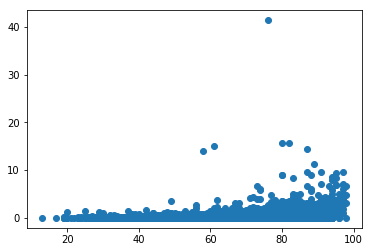

In [61]:
x = vg[(vg.Critic_Score.notnull()) & vg.NA_Sales.notnull()].Critic_Score
y = vg[(vg.Critic_Score.notnull()) & vg.NA_Sales.notnull()].NA_Sales
x2 = vg[(vg.Critic_Score.notnull()) & vg.NA_Sales.notnull()].NA_Sales

#Aqui voce pode escolher transpor ou nao, o importante eh ficar de acordo com seu codigo acima
#x = np.array([x,x*x])

plt.plot(x,y,'o')
plt.show()

#xpred = np.linalg(1,10,1000)


#b = regressaoLinearMultipla([(np.array(len(x),x2],y)



#resolveLin(b,[8.5,8.5*8.5])

E se eu quiser fazer uma regressão múltipla com nota dos criticos e dos usuários para prever as vendas globais?

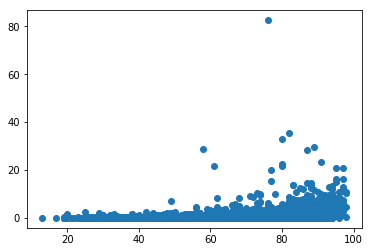

In [62]:
x = vg[(vg.Critic_Score.notnull()) & (vg.User_Score.notnull()) &vg.Global_Sales.notnull()].Critic_Score
#x2 = vg[(vg.Critic_Score.notnull()) & (vg.User_Score.notnull())& vg.Global_Sales.notnull()].User_Score
y = vg[(vg.Critic_Score.notnull()) & (vg.User_Score.notnull()) & vg.Global_Sales.notnull()].Global_Sales




#b = regressaoLinear(np.array([x]),y)
plt.plot(x,y,'o')
plt.show()
#print(b)


## Qualidade da Regressão ##

OK, fizemos alguns modelos, mas como podemos saber a qualidade da regressão? Usando a fórmula do $R^2$:

$$
R^2 = 1 - \frac{D(b)}{\sum y_{i}^2 - \frac{1}{n}(\sum y_i)^2}
$$

Onde $D(b)$ é a distância quadrática dos y previstos pela regressão para os $y$ reais.

Implemente a função que computa $R^2$:



$$
R^2 = 1 - \frac{D(b)} (\sum(y - \bar(y))}
$$

In [63]:
def resolveLinVet(b,x):
    
    return (b[0]+b[1:]*xquad).sum(axis=1)
      
def distanciaquad(y,yp):
    
    return ((y-yp)**2).sum()
    
def r2(y,yp):
    return 1- distanciaquad(y,yp)/((y-yp.mean())**2).sum()





#d eh a distancia d = sqrt(somatorio(original-previsto^2)^2)
#

In [64]:
xp = np.array([1.2,2.5,3.,4.1,6.2,7.1,8.8,9.5])
yp = np.array([6.8,6.1,9.9,9.7,12.1,17.9,18,21.5])
b = regressaoLinear(xp,yp)


media = np.full(len(yp),yp.mean())
#r2(b,xp,yp)

r2(yp,media)


#se for negativo é pq ele erra mais do que acerta
#correlaçao entre valores dependentes e independentes

0.0

## Diferentes recortes dos dados ##

Muitas vezes, temos __informação demais__ para os métodos de regressão encontrarem uma correlação boa. Por isto, é muito comum neste tipo de aplicação, fazer a regressão com subconjuntos dos dados.

Por exemplo: Ao se tentar prever as vendas globais, focar em um período de tempo específico ou em apenas uma ou poucas plataformas pode gerar modelos de predição mais precisos.

Exemplo:


Vamos inicialmente fazer uma predição das vendas globais baseada na nota dos críticos:

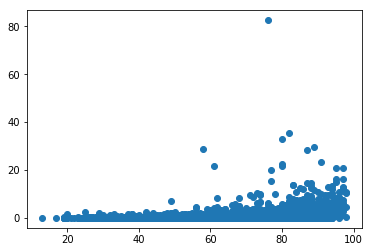

0.029020401777523186

In [65]:
vglimpo=vg[(vg.Critic_Score.notnull()) & (vg.Global_Sales.notnull())]



#x critic 
#y global scors
xg = vglimpo.Critic_Score
yg = vglimpo.Global_Sales
#plt.yscale('log')



plt.scatter(xg,yg)
plt.show()

b = regressaoLinear(np.array(xg),np.array(yg))

r2(yg, resolveLin(b,xg))

In [66]:
b = regressaoLinear(np.array(xg),yg)

r2(y,yp)

ValueError: operands could not be broadcast together with shapes (7017,) (8,) 

Será que dá para melhorar? Vamos tentar focar apenas nos consoles da sétima geração (PS3, Xbox360, Wii):

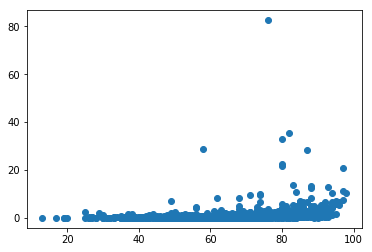

In [67]:
x = vglimpo[(vglimpo.Platform.isin(['PS3','XBOX360','Wii']))].Critic_Score
y = vglimpo[(vglimpo.Platform.isin(['PS3','XBOX360','Wii']))].Global_Sales
#plt.yscale('log')

plt.scatter(x,y)
plt.show()

Faça um teste comparando o nivel da regressao acima com uma regressão contendo todos os jogos de 2000 a 2005

## Agrupando ##

Você pode usar o comando groupby para gerar novas bases de dados modificadas. Por exemplo, você pode tentar prever as vendas totais de plataformas ao invés de jogos individuais. Contudo, para você utilizar os dados agrupados, você deve usar uma função de agregação (sum,count, min,max, mean, etc).

### Exemplo ###

Criando um agrupamento por plataforma

In [68]:
vgplat = vg.groupby(['Platform'])

#agruapar com novas bases
vgplat.Global_Sales.sum()

Platform
2600      97.08
3DO        0.10
3DS      259.09
DC        15.97
DS       807.10
GB       255.45
GBA      318.50
GC       199.36
GEN       30.78
GG         0.04
N64      218.88
NES      251.07
NG         1.44
PC       260.30
PCFX       0.03
PS       730.68
PS2     1255.64
PS3      939.43
PS4      314.23
PSP      294.30
PSV       54.12
SAT       33.59
SCD        1.87
SNES     200.05
TG16       0.16
WS         1.42
Wii      908.13
WiiU      82.16
X360     971.63
XB       258.26
XOne     159.44
Name: Global_Sales, dtype: float64

Fazendo uma regressão para descobrir total de vendas de um console pelo total de jogos lançados para ele:

0.6438881415900342

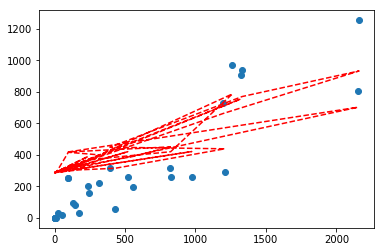

In [70]:
x = vgplat.Name.count()
y = vgplat.Global_Sales.sum()
plt.scatter(x,y)
ypred = resolveLin(regressaoLinear(x,y), y)
plt.plot(x,ypred,'r-')
r2(y,ypred)

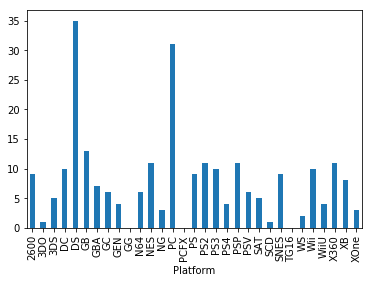

In [51]:
#Total de anos que um console teve jogos

anos = vgplat.Year_of_Release.max() - vgplat.Year_of_Release.min()
anos.plot(kind='bar')

Vocês poderiam usar a informação de ano para ponderar alguma outra informação usada na regressão por exemplo. Contudo, tem algo estranho né? O Nintendo DS está com 35 anos de jogos lançados. Vocês conseguem descobrir o porquê?